# DSCI 552 | Homework 1 - Jan.30, 2024

- Name: Leyi Sun
- USC ID: 4442287692
- Github Account: helensun2001

## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

## (a) Download and import data

In [2]:
data = pd.read_csv("../data/vertebral_column_data/column_2C.dat",
                    delimiter=" ",
                    header = None, 
                    names = ['pelvic_incidence',
                             'pelvic_tilt',
                             'lumbar_lordosis_angle',
                             'sacral_slope',
                             'pelvic_radius',
                             'degree_spondylolisthesis',
                             'class'])


In [3]:
#data = pd.concat([data1,data2])
data['label'] = 0
data['label'][data['class']=='AB'] = 1
data['label'][data['class']=='NO'] = 0
#NO=0 and AB=1
data.drop(columns = ['class'],inplace=True)


In [4]:
data.describe

<bound method NDFrame.describe of      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0               63.03        22.55                  39.61         40.48   
1               39.06        10.06                  25.02         29.00   
2               68.83        22.22                  50.09         46.61   
3               69.30        24.65                  44.31         44.64   
4               49.71         9.65                  28.32         40.06   
..                ...          ...                    ...           ...   
305             47.90        13.62                  36.00         34.29   
306             53.94        20.72                  29.22         33.22   
307             61.45        22.69                  46.17         38.75   
308             45.25         8.69                  41.58         36.56   
309             33.84         5.07                  36.64         28.77   

     pelvic_radius  degree_spondylolisthesis  label  
0          

## (b) Pre-Processing and Exploratory data analysis:

### (b)-i 
- Make scatterplots of the independent variables in the dataset. 
- Use color to show Classes 0 and 1.

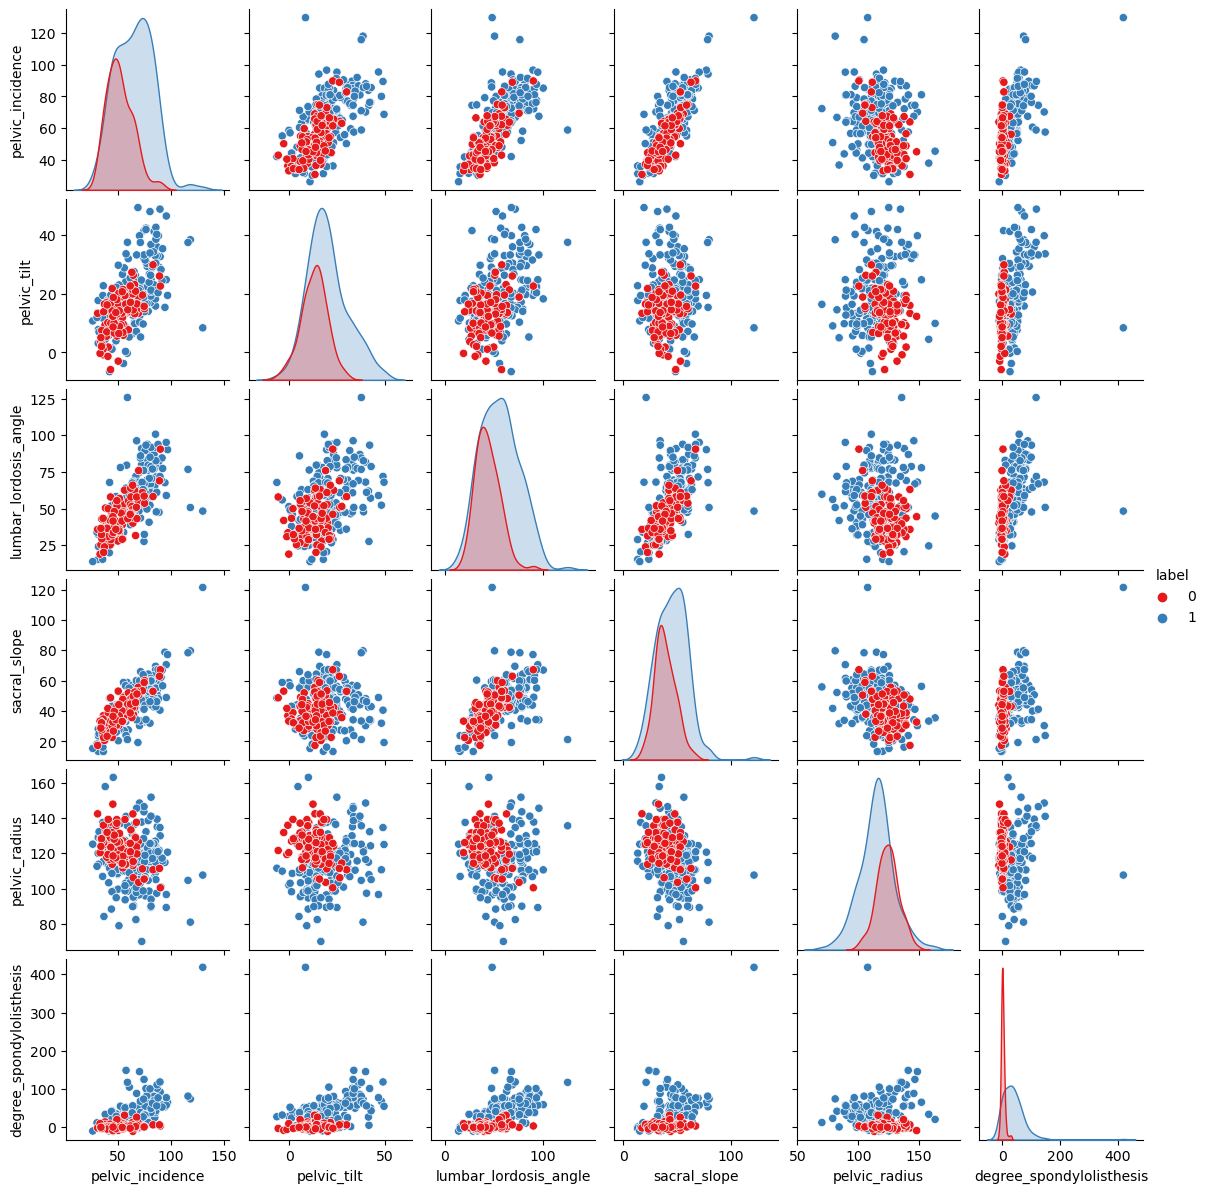

In [5]:
fig = sns.pairplot(data, 
                   hue = 'label',
                   palette='Set1')
fig.fig.set_size_inches(12,12)
#fig.fig.suptitle("Scatter Plot of all independent variables", y=1.1)

### (b)-ii
- Make boxplots for each of the independent variables. 
- Use color to show Classes 0 and 1.

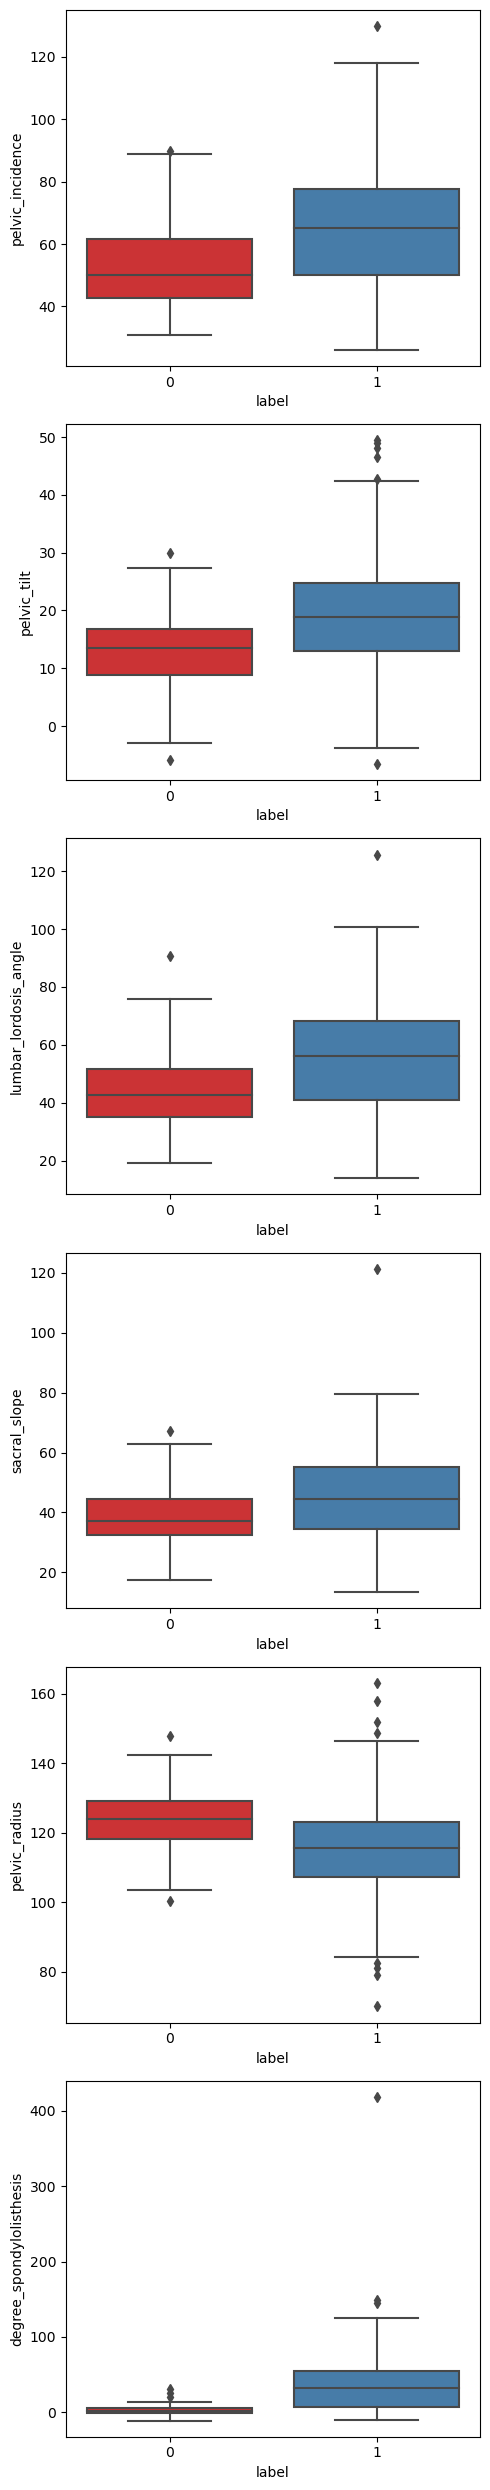

In [6]:
c1 = (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)
c2 = (0.21568627450980393, 0.49411764705882355, 0.721568627450980)
fig, axes = plt.subplots(6,1, figsize=(5, 25))
for i in range(6):
    sns.boxplot(data=data, x="label", y=data.columns[i],
                ax = axes[i],
                palette='Set1')
    axes[i].set_ylabel(f'{list(data.columns)[i]}')

plt.tight_layout()

### (b)-iii
- Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [7]:
training_set = pd.concat([data[data['label']== 0].iloc[0:70,], 
                          data[data['label'] == 1].iloc[0:140,]])
testing_set = pd.concat([data[data['label']== 0].iloc[70:,], 
                          data[data['label'] == 1].iloc[140:,]])

# separating testing dataset into features and labels
x_train = training_set.drop(columns = ['label']).values
y_train = training_set['label'].values

x_val = testing_set.drop(columns = ['label']).values
y_val = testing_set['label'].values


## (c) Classification using KNN



### (c)-i 
- Which k∗ is the most suitable k among those values? 
  - k = 4

The best k in range(208,0,-2) is 4.
When k = 4, the testing error reaches the minimum 0.06.


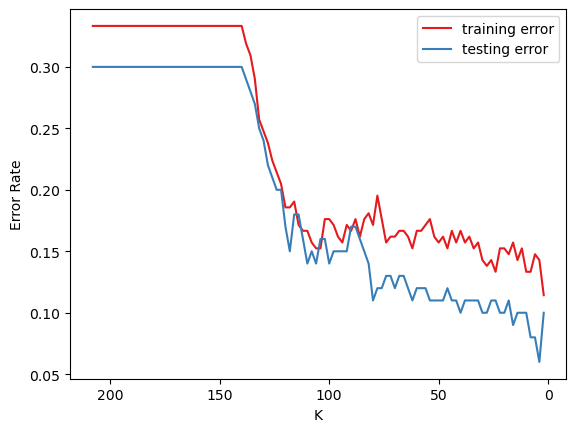

In [8]:
training_error_list = []
testing_error_list = []
best_k_value = 0
min_error = 100 #float("inf")

range_k = range(208, 0, -2)
for k in range_k:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    classifier.fit(x_train, y_train)
    
    # calculating accuracy score for given value of k for training and testing
    # error = 1 - accuracy
    training_error = 1 - accuracy_score(y_train, classifier.predict(x_train))
    training_error_list.append(training_error)

    testing_error = 1 - accuracy_score(y_val, classifier.predict(x_val))
    testing_error_list.append(testing_error)

    if testing_error < min_error:
        min_error = testing_error
        best_k_value = k

print('The best k in range(208,0,-2) is {}.'.format(best_k_value))
print('When k = {}, the testing error reaches the minimum {}.'.format(best_k_value,round(min_error, 2)))


x = range_k
plt.plot(x, training_error_list, label="training error",color = c1)
plt.plot(x, testing_error_list, label="testing error",color=c2)
plt.gca().invert_xaxis()
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Error Rate")
plt.gca().legend()
plt.show()

### (c)-ii
- Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗

In [9]:
# Fit the model with k = 4
from sklearn.metrics import confusion_matrix


classifier_4 = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
classifier_4.fit(x_train, y_train)
y_val_pred = classifier_4.predict(x_val)
confusion_matrix = confusion_matrix(y_val,y_val_pred)
tn, fn, tp, fp = confusion_matrix[0][0], confusion_matrix[1][0], confusion_matrix[1][1], confusion_matrix[0][1]

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision*recall)/(precision + recall)

df_matrix = pd.DataFrame({
    'T/F': ['True','False'],
    'Positive': [tp,tn],
    'Negative': [fp,fn]
})
df_matrix.set_index(keys = 'T/F',inplace=True)
print(df_matrix)

df_scores = pd.DataFrame({
    'true positive rate':[round(tpr,2)],
    'true negative rate':[round(tnr,2)],
    'precision':[round(precision,2)],
    'recall':[round(recall,2)],
    'f1 score':[round(f1_score,2)]
})

print('___________________________')
result = df_scores.T
result.columns = ['value']
print(result)

       Positive  Negative
T/F                      
True         69         5
False        25         1
___________________________
                    value
true positive rate   0.99
true negative rate   0.83
precision            0.93
recall               0.99
f1 score             0.96


### (c)-iii
- Plot the learning curve

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def Plot_learning_curve(N_range,
                        best_error_list):
    plt.plot(N_range, best_error_list, label="Best Test Error")
    plt.gca().set_title("Learning Curve")
    plt.gca().set_xlabel("Training Set Size")
    plt.gca().set_ylabel("Best Error Rate")
    plt.gca().legend()
    plt.show()

def Best_Ks_for_N_samples(N_range,
                         KNN_metric,
                         p,
                         optional_params,
                         k_range):
    best_k_list = []
    best_error_list = []
    total_min_error = 100

    for N in N_range:
        n = int(N/3)
        n1 = N-n
        training_set = pd.concat([data[data['label']== 0].iloc[0:n,], 
                            data[data['label'] == 1].iloc[0:n1,]])
        testing_set = pd.concat([data[data['label']== 0].iloc[n:,], 
                            data[data['label'] == 1].iloc[n1:,]])
        
        x_train = training_set.drop(columns = ['label']).values
        y_train = training_set['label'].values
        x_val = testing_set.drop(columns = ['label']).values
        y_val = testing_set['label'].values

        training_error_list = []
        testing_error_list = []
        min_error = 100


        multi_min_k = []
        ks = []

        if k_range == 'flexible':
            k_range = range(1,N,5)
        else:
            k_range = k_range

        for k in k_range:
            
            if KNN_metric == 'mahalanobis':
                classifier = KNeighborsClassifier(n_neighbors = k, p = p, metric=KNN_metric,metric_params=optional_params)
            else:
                classifier = KNeighborsClassifier(n_neighbors = k, p = p, metric=KNN_metric)
                
            classifier.fit(x_train, y_train)
            
            training_error = 1 - accuracy_score(y_train, classifier.predict(x_train))
            training_error_list.append(training_error)

            testing_error = 1 - accuracy_score(y_val, classifier.predict(x_val))
            testing_error_list.append(testing_error)


            # if testing_error < min_error:
            #     min_error = testing_error
            #     best_k = k
            #     best_error = min_error
            #     multi_min_k.append(best_k)
            if (testing_error <=  min_error) and  (k > 1):
                ks.append(k)
                best_k = k
                min_error = testing_error
                N0 = N
        
        best_k_list.append(best_k)
        best_error_list.append(min_error)


    if p != 1:
        print('when p = {}, the testing error reaches the minimum {}.'.format(p,round(min_error, 4)))
    
    else:
    #print('The best k is {}.'.format(total_best_k))
        print('When N = {}, the testing error reaches the minimum {}, with k getting value from the list of {}'.format(N0,round(total_min_error, 4),ks))
        #print('Best N is {}.'.format(N))
        # print(ks)
    

    if len(N_range) >= 5: 
        Plot_learning_curve(N_range,
                            best_error_list)
    
    total_min_error = min(best_error_list)
    



When N = 210, the testing error reaches the minimum 100, with k getting value from the list of [6]


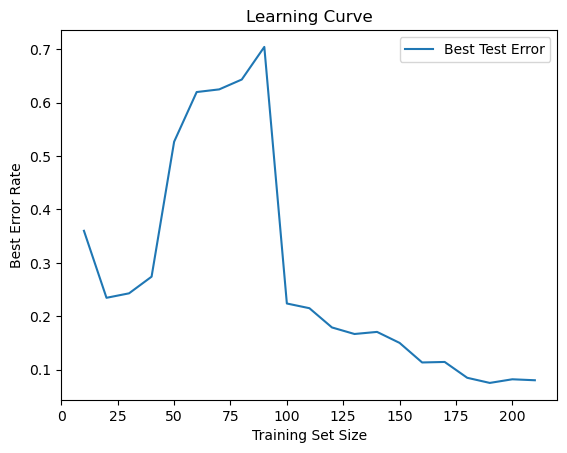

In [11]:
Best_Ks_for_N_samples(N_range = range(10, 211, 10),
                         KNN_metric = 'euclidean',
                         p=1,
                         k_range='flexible',
                        optional_params=None)

## (d) Exploration of distance metrics

### (d)-i-A
- The best k is the minimum k which results in the lowest testing error of 0.11.
- Among k = 6 or 11 or 26, k = 6 is the optimal.

In [12]:
Best_Ks_for_N_samples(N_range = [210],
                    KNN_metric = 'manhattan',
                    p = 1,
                    k_range=range(1,200,5),
                    optional_params=None)

When N = 210, the testing error reaches the minimum 100, with k getting value from the list of [6, 11, 26]


### (d)-i-B
- The best log10(p) is 0.6, which results in the minimum testing error of 0.06.

In [13]:
p_range = []
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    p_range.append(math.pow(10,i))

for p in p_range:
    Best_Ks_for_N_samples(N_range = [210],
              p = p,
              KNN_metric='minkowski',
              k_range=range(1,200,5),
              optional_params=None)
    

when p = 1.2589254117941673, the testing error reaches the minimum 0.09.
when p = 1.5848931924611136, the testing error reaches the minimum 0.09.
when p = 1.9952623149688795, the testing error reaches the minimum 0.08.
when p = 2.51188643150958, the testing error reaches the minimum 0.08.
when p = 3.1622776601683795, the testing error reaches the minimum 0.08.
when p = 3.9810717055349722, the testing error reaches the minimum 0.06.
when p = 5.011872336272722, the testing error reaches the minimum 0.07.
when p = 6.309573444801933, the testing error reaches the minimum 0.08.
when p = 7.943282347242816, the testing error reaches the minimum 0.09.
when p = 10.0, the testing error reaches the minimum 0.09.


### (d)-i-C
- The best k is the minimum k which results in the lowest testing error of 0.08.
- Among k = 6 or 16, k = 6 is the optimal.

In [14]:
Best_Ks_for_N_samples(N_range = [210],
              p = 1,
              KNN_metric='chebyshev',
              k_range=range(1,200,5),
              optional_params=None)
    

When N = 210, the testing error reaches the minimum 100, with k getting value from the list of [6, 16]


### (d)-ii 
- The best k is 6 which results in the lowest testing error of 0.17.

In [15]:
Best_Ks_for_N_samples(N_range = [210],
            p = 1,
            KNN_metric='mahalanobis',
            optional_params={"VI": np.linalg.pinv(np.cov(x_train, rowvar=False))},
            k_range=range(1,200,5))

When N = 210, the testing error reaches the minimum 100, with k getting value from the list of [6]


## (e) Weighted decision


In [16]:
N =210
n = int(N/3)
n1 = N-n
training_set = pd.concat([data[data['label']== 0].iloc[0:n,], 
                    data[data['label'] == 1].iloc[0:n1,]])
testing_set = pd.concat([data[data['label']== 0].iloc[n:,], 
                    data[data['label'] == 1].iloc[n1:,]])


def KNN_training(training_set,
                 testing_set,
                 distance_metric,
                 p,
                 weight_type,
                 optional_params):
    
    x_train = training_set.drop(columns = ['label']).values
    y_train = training_set['label'].values
    x_val = testing_set.drop(columns = ['label']).values
    y_val = testing_set['label'].values

    training_error_list = []
    testing_error_list = []

    min_error = 100 #float("inf")

    range_k = range(1,200,5)
    ks,train_error_list = [],[]

    for k in range_k:
        classifier = KNeighborsClassifier(n_neighbors = k, p = p,metric=distance_metric,weights = weight_type,metric_params=optional_params)
        classifier.fit(x_train, y_train)
        
        # calculating accuracy score for given value of k for training and testing
        # error = 1 - accuracy
        training_error = 1 - accuracy_score(y_train, classifier.predict(x_train))
        training_error_list.append(training_error)

        testing_error = 1 - accuracy_score(y_val, classifier.predict(x_val))
        testing_error_list.append(testing_error)

        if (testing_error <=  min_error) and  (k > 1):
            ks.append(k)
            train_error_list.append(training_error)
            best_k = k
            min_error = testing_error

        
    result_df = pd.DataFrame({
        'Best k values':ks,
        'Minimum testing error':len(ks)*[min_error],
        'Minimum training error': train_error_list
    })

    print(result_df)



In [17]:
print('When distance are weighted:\n')

for metric in ["euclidean", "manhattan", "chebyshev"]: 
    print('KNN result for' + ' ' + f'{metric}' + ':')
    print('-------------------------------------------------------------------') 
    KNN_training(training_set,
                testing_set,
                distance_metric=metric,
                p = 1,
                weight_type = 'distance',
                optional_params=None)

    print('\n')


When distance are weighted:

KNN result for euclidean:
-------------------------------------------------------------------
   Best k values  Minimum testing error  Minimum training error
0              6                    0.1                     0.0


KNN result for manhattan:
-------------------------------------------------------------------
   Best k values  Minimum testing error  Minimum training error
0              6                    0.1                     0.0
1             11                    0.1                     0.0
2             21                    0.1                     0.0
3             26                    0.1                     0.0


KNN result for chebyshev:
-------------------------------------------------------------------
   Best k values  Minimum testing error  Minimum training error
0              6                   0.11                     0.0
1             11                   0.11                     0.0
2             16                   0.11      

In [18]:
print('When distance are not weighted:\n')
for metric in ["euclidean", "manhattan", "chebyshev","mahalanobis"]:  
    print('KNN result for' + ' ' + f'{metric}' + ':')
    print('-------------------------------------------------------------------')
    if metric == "mahalanobis":
        op = {"VI": np.linalg.pinv(np.cov(x_train, rowvar=False))}
    else:
        op = None
    KNN_training(training_set,
                testing_set,
                distance_metric=metric,
                p = 1,
                weight_type = 'uniform',
                optional_params=op)
    print('\n')


When distance are not weighted:

KNN result for euclidean:
-------------------------------------------------------------------
   Best k values  Minimum testing error  Minimum training error
0              6                   0.08                0.147619


KNN result for manhattan:
-------------------------------------------------------------------
   Best k values  Minimum testing error  Minimum training error
0              6                   0.11                0.138095
1             11                   0.11                0.142857
2             26                   0.11                0.166667


KNN result for chebyshev:
-------------------------------------------------------------------
   Best k values  Minimum testing error  Minimum training error
0              6                   0.08                0.152381
1             16                   0.08                0.152381


KNN result for mahalanobis:
-------------------------------------------------------------------
   Best

## (f) Lowest training error
- The lowest training error achieved in this homework is: 0.



## References
- Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani, An Introduction to Statistical Learning with Applications in R, Springer, 2021

In [2]:
8/120

0.06666666666666667

In [5]:
8/50

0.16

In [6]:
0.05*16



0.8

In [7]:
6.7/100*16

1.072